This small project aims to predict whether a team will have the "Man of the match" player in the team.

The focus of this project is to use pre-processing techniques and finalize the analysis in such a way that it would fit bo be submitted for a competition.

A bit about the data. 

This dataset has been obtained from Kaggle, with the primary data source being the 2018 World Cup Russia app.

The variables:
- DateMatch: Date
- TeamPlaying: Team
- Opponent: Opponent Team
- Goal Scored: Number of goals scored by this team
- Ball Possession: %Amount of time ball was in control by the team
- Attempts: Number of attempts to score goal
- On-Target: Number of shots on-target
- Off-Target: Number of shots that went off-target
- Blocked: Number of opponent team's attempts blocked by the team
- Corners: Number of corner shots used
- Offsides: Number of off-side events
- Free Kicks: Number of free-kicks used
- Saves: Number saves by the goal keeper
- Pass Accuracy: %Percentage of passes that reached the same team player as aimed
- Passes: Total number of passes by the team
- Distance Covered (Kms): Total distance covered by the team members in this game
- Fouls Committed: Number of fouls committed by the team members
- Yellow Card: Number of Yellow warning received
- Yellow & Red: Number of Yellow & Red warning received
- Red: Number of Red cards received
- Man of the Match: Did this team member win Man of the Match?
- 1st Goal: When did the team score the 1st goal?
- Round: Stage of the match
- PSO: Was there a penalty shootout (PSO) in this match?
- Goals in PSO: Number of goals scored in the Penalty shootout
- Own goals: Number of own goals
- Own goal Time: When did the team score own goal?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv')

In [3]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
#create a function that would output all basic statistics at once
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))


In [5]:
describe_data(data)

Data Types:
Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object
Rows and Columns:
(128, 27)
Column Names:
Index(['Date',

A few important details:
- there are a few string variables. In particular, the outcome variable - "Man of the match"
- a few variables will not be needed for the analysis - the first tree as they do not seem to add any important information that may help determine whether the team will have a member who would be names the man of the match.
- there are a few missing values that will have to be dealt with. 
- the dataset ir really small - 128 entries.

In [6]:
#there are a few missing values in variables: "1st Goal", "Own goals","Own goal Time".
#let's look into those values more, whether this is fixable, and decide if we need these variables for the model.

#looks like the 1st Goal variable can be missing if the team never scored a goal
data[data['Goal Scored']==0][['1st Goal','Goal Scored']]
#this means that I will remove the 1st goal variable from the dataset

,1st Goal,Goal Scored
1,NaN,0
2,NaN,0
4,NaN,0
12,NaN,0
15,NaN,0
16,NaN,0
18,NaN,0
23,NaN,0
25,NaN,0
35,NaN,0


In [7]:
#quick fix, make sure the notebook shows all columns and more rows
pd.set_option('display.max_columns', 27)
pd.set_option('display.max_rows', 100)

In [8]:
#now let's investigate other variables
data[(data['Own goals'].isnull())]
#Own goal time is missing when Own goals are missing - can drop the Own goal time column.
#so far hard to assert why Own Goals columsn is sometimes missing

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,0,22,2,86,194,100,14,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,1,13,2,87,366,102,12,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,3,13,0,93,727,103,10,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,0,19,1,87,484,103,16,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
10,16-06-2018,Argentina,Iceland,1,72,26,7,9,10,10,0,15,2,92,718,101,10,0,0,0,No,19.0,Group Stage,No,0,NaN,NaN
11,16-06-2018,Iceland,Argentina,1,28,9,3,5,1,2,0,10,7,67,189,105,15,0,0,0,Yes,23.0,Group Stage,No,0,NaN,NaN


In [9]:
data['Own goals'].value_counts()
#from this we see that there has been 12 instances with one own goal. 
#this means that in NaN situations there was no own goal, which is an option we can convert to zero and still use 
#for modelling

1.0    12
Name: Own goals, dtype: int64

Few small fixes to implement:
- drop '1st Goal' and 'Own goal time' variables from the training dataset (as well as the first 3 vars that are simply not useful for the analysis
- replace NaN values in 'Own goals' to 0.

In [10]:
train = data.drop(['1st Goal', 'Own goal Time','Date','Team', 'Opponent'],axis=1)

In [11]:
train.loc[(train['Own goals'].isnull(),'Own goals')] = 0
train['Own goals'].value_counts()

0.0    116
1.0     12
Name: Own goals, dtype: int64

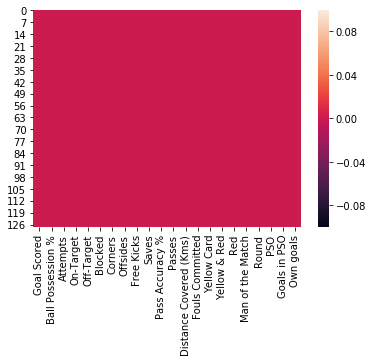

In [12]:
sb.heatmap(train.isnull())
#no more missing values in the training dataset

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 22 columns):
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-null int64
Man of the Match          128 non-null object
Round                     128 non-null object
PSO                       128 non-null

In [14]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).drop(['Man of the Match'], axis=1).columns

In [15]:
numeric_features

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', 'Goals in PSO',
       'Own goals'],
      dtype='object')

In [16]:
categorical_features

Index(['Round', 'PSO'], dtype='object')

When the data has been separated, I am creating two transformer pipelines, one for numeric, and the other for categorical variables, to complete the final transformation of variables.

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric transformer:
- imputes any missing values with the mean (although we already saw that in this dataset, there are no missing variables, it is still good to include the step just in case).
- standardizesnumeric features by removing the mean and scaling to unit variance.

categorical transformer:
 - replaces missing values with with fill_value. The fill value here is just a string saying that the data is missing. (Again, we already saw that in this dataset, there are no missing variables, it is still good to include the step just in case, because null values can impede the prediction process).
 - creates dummy variables instead of categorical variables.
 

In [18]:
#the code below will allow us to implement the pipelines created above on the numeric and 
#categorical variables, and to concatenate the features.

from sklearn.compose import ColumnTransformer

final_train = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [19]:
#this is just writing down the steps, but not yet implementing them on the data
final_train

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                           

So far we have worked with the data to make sure it is ready to be processed through a machine learning algorithm.

Next we go through splitting the data and fitting and predicting.

In [20]:
from sklearn.model_selection import train_test_split

X = train.drop('Man of the Match', axis=1)
y = train['Man of the Match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline(steps=[('final data', final_train),
                      ('classifier', LogisticRegression())])

In [22]:
lr.fit(X_train, y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.750


/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


So the accuracy of the model is 75%. 

In particular:

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(lr.predict(X_test),y_test))
print('\n')
print(classification_report(lr.predict(X_test),y_test))
print('The average model accuracy is 75%, with 81% actual men of the match in a team predicted correctly,and 68% no man of the match predicted correctly')

[[17  5]
 [ 8 22]]


              precision    recall  f1-score   support

          No       0.68      0.77      0.72        22
         Yes       0.81      0.73      0.77        30

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.76      0.75      0.75        52

The average model accuracy is 75%, with 81% actual men of the match in a team predicted correctly,and 68% no man of the match predicted correctly


Now, I will use the model to predict the "Man of the match values" and compare them with the actuals on the full dataset.

In [24]:
# creating a new dataframe
after_model = train
#rename the 'Man of the Match column to keep the old scores in the set
after_model = after_model.rename(columns={'Man of the Match': 'Man of the Match_orignal'})

In [25]:
after_model.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red',
       'Man of the Match_orignal', 'Round', 'PSO', 'Goals in PSO',
       'Own goals'],
      dtype='object')

In [26]:
test_predictions = lr.predict(after_model.drop('Man of the Match_orignal', axis=1))

In [27]:
test_predictions

array(['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

In [28]:
#attaching the predictions column to the main dataset
after_model['Man of the Match_prediction'] = test_predictions

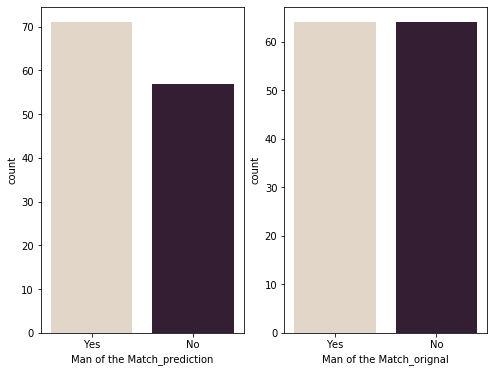

In [29]:
#ploting the originals and predictions in one graph for visual comparison
fig, axs = plt.subplots(1,2,figsize=(8,6))
sb.catplot(x="Man of the Match_prediction", kind="count", palette="ch:.25", data=after_model,ax=axs[0])
sb.catplot(x="Man of the Match_orignal", kind="count", palette="ch:.25", data=after_model, ax=axs[1])
plt.close(2)
plt.close(3)

Visually we can see that the issue is that the prediction yields to a few more false positives than false negatives. The final dataset with both original outcome variable and its prediciton based on the model would be "after_model".

For the sake of completion of the exercise, I will compare these results to a scenrio, where I pre-process the data just to the point there are no missing values and all variables are numeric.

In [30]:
#Picking up from when all missing values have been dealt with and a few categorical variables are left in the train datset
#we need to make sure all variables are numerical, in particular - 'Round' and 'PSO' ('Man of the Match' - is what we will be predicting, so it doesnt matter)
#first, will tackle Round
train['Round'].value_counts()
#from value counts we see that there is some sort of an ordinal relationship betweeen the values, hence
#contrary to OneHotEncoder that we used above, we could even manually encode the values below


Group Stage       96
Round of 16       16
Quarter Finals     8
Semi- Finals       4
3rd Place          2
Final              2
Name: Round, dtype: int64

In [31]:
#does not work - come back to this
#cleanup_round = {"Round":     {"Group Stage": 1, "Round of 16": 2, 
#                               "Quarter Finals": 3, "Semi- Finals":4, "3rd Place":5, "Final":6}}
#cleanup_round

In [32]:
#train = train.replace(cleanup_round, inplace=True)
#train['Round'].value_counts()

In [33]:
#try labelencoder
from sklearn import preprocessing

In [34]:
le = preprocessing.LabelEncoder()

train['Round'] = le.fit_transform(train['Round'])
train['Round'].head()

0    2
1    2
2    2
3    2
4    2
Name: Round, dtype: int64

In [35]:
#and now its left to dal with PSO - encode it
train['PSO'].value_counts()

No     120
Yes      8
Name: PSO, dtype: int64

In [36]:
train['PSO'] = pd.get_dummies(train['PSO'], drop_first=True)
train['PSO'].value_counts()

0    120
1      8
Name: PSO, dtype: int64

In [37]:
train.info()
#since noe of the vars are stings anymore and none are missing, will proceed to splitting, fitting and predictingthe model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 22 columns):
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-null int64
Man of the Match          128 non-null object
Round                     128 non-null int64
PSO                       128 non-null 

In [38]:
X = train.drop('Man of the Match',axis=1)
y = train['Man of the Match']

#use same params as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [39]:
lr2 = LogisticRegression()

In [40]:
lr2.fit(X_train, y_train)
print("model score: %.3f" % lr2.score(X_test, y_test))

model score: 0.750


/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
#print the classification report
print(confusion_matrix(lr2.predict(X_test),y_test))
print('\n')
print(classification_report(lr2.predict(X_test),y_test))

[[18  6]
 [ 7 21]]


              precision    recall  f1-score   support

          No       0.72      0.75      0.73        24
         Yes       0.78      0.75      0.76        28

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52



In [42]:
prediction2 = lr2.predict(train.drop('Man of the Match',axis=1))
train['Man of the Match_prediction'] = prediction2

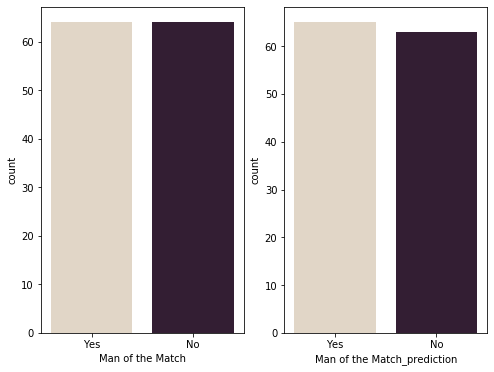

In [43]:
fig, axs = plt.subplots(1,2,figsize=(8,6))
sb.catplot(x="Man of the Match", kind="count", palette="ch:.25", data=train,ax=axs[0])
sb.catplot(x="Man of the Match_prediction", kind="count", palette="ch:.25", data=train, ax=axs[1])
plt.close(2)
plt.close(3)
#mind here the fact that bars are similar merely reflect the amount of "yes" or "no's", 
#not exactly whether these are correctly estimated

In [ ]:
g = sns.FacetGrid(train, hue='Man of the Match_prediction', size=4)
g.map(sns.pointplot, 'x2', 'yhat')
g.add_legend();
sns.despine(offset=10);

Although the average accuracy of the two models is the same, the more manual approach in data processing has led to more accurate true negative predictions, but a bit less accurate true postivie predictions.


The purpose of this project was to apply a few data pre-processing techniques and some more advanced python syntaxt to fit a model to data. In particular, I:
- did some initial exploratory data analysis after which I dropped a few irrelevant variables.
- set up a pipeline for numeric and categorical variables that scales, treat missing values and categorical data.
- set up another pipeline that preproceses data and fits a model.
- predicted some values of a model.

After that, I explored, whether going back to more rudimental data pre-processing approach may lead to different results. What I found:
- the precision has increased for predicting negative values.
- however, the precision predicting positive values has decreased.


